In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('PakWheelsDataSet.csv')

DATA CLEANING


In [ ]:
data.shape

(47155, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47155 entries, 0 to 47154
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           47155 non-null  int64  
 1   Make                 47155 non-null  object 
 2   Name                 47155 non-null  object 
 3   Transmission         47154 non-null  object 
 4   Engine Type          47154 non-null  object 
 5   Engine Capacity(CC)  47151 non-null  float64
 6   Mileage(kms)         47154 non-null  float64
 7   City                 47154 non-null  object 
 8   Year                 47154 non-null  float64
 9   Price                47154 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 3.6+ MB


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.describe()

,Engine Capacity(CC),Mileage(kms),Year,Price
count,47151.000000,47154.000000,47154.000000,4.715400e+04
mean,1536.904329,84529.548395,2012.422636,3.285102e+06
std,758.061386,76563.975965,7.273053,4.664670e+06
min,16.000000,1.000000,1940.000000,5.000000e+05
25%,1000.000000,35000.000000,2008.000000,1.300000e+06
50%,1400.000000,75347.500000,2014.000000,2.190000e+06
75%,1800.000000,115000.000000,2018.000000,3.400000e+06
max,6603.000000,999999.000000,2021.000000,9.350000e+07


In [ ]:
data.head(5)

,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),City,Year,Price
0,Honda,BR-V i-VTEC S,Automatic,Petrol,1500.0,41371.0,Karachi,2017.0,3150000.0
1,Toyota,Corolla Altis Automatic 1.6,Automatic,Petrol,1600.0,2460.0,Karachi,2021.0,3575000.0
2,Toyota,Vitz F Limited II 1.0,Automatic,Petrol,1000.0,67000.0,Karachi,2014.0,1955000.0
3,Daihatsu,Move Custom X Limited,Automatic,Petrol,660.0,64000.0,Lahore,2013.0,1450000.0
4,Toyota,Prado TX L Package 2.7,Automatic,Petrol,2700.0,64000.0,Lahore,2016.0,19000000.0


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Make                   0
Name                   0
Transmission           1
Engine Type            1
Engine Capacity(CC)    4
Mileage(kms)           1
City                   1
Year                   1
Price                  1
dtype: int64


In [ ]:
data["Price"] = data["Price"].replace(0, np.nan, regex=False)
data["Mileage(kms)"] = data["Mileage(kms)"].replace(0, np.nan, regex=False)
data["Engine Capacity(CC)"] = data["Engine Capacity(CC)"].replace(0, np.nan, regex=False)

data= data.dropna(subset=['Price','Mileage(kms)','Year','City','Make','Transmission','Engine Capacity(CC)']).drop_duplicates(keep='first')
data.shape


(42035, 9)

In [ ]:
data.columns

Index(['Make', 'Name', 'Transmission', 'Engine Type', 'Engine Capacity(CC)',
       'Mileage(kms)', 'City', 'Year', 'Price'],
      dtype='object')

In [ ]:
data.describe()

,Engine Capacity(CC),Mileage(kms),Year,Price
count,42035.000000,42035.000000,42035.000000,4.203500e+04
mean,1503.268300,87122.940906,2012.085381,3.012768e+06
std,724.546556,78220.998552,7.368163,4.221992e+06
min,16.000000,1.000000,1940.000000,5.000000e+05
25%,1000.000000,38000.000000,2007.000000,1.250000e+06
50%,1300.000000,79000.000000,2014.000000,2.050000e+06
75%,1800.000000,118000.000000,2018.000000,3.200000e+06
max,6603.000000,999999.000000,2021.000000,9.350000e+07


In [ ]:
data.rename(columns={'Price': 'Price(PKR)'}, inplace=True)


In [ ]:
# calculate the z-scores - rerun step 3

data['Price(PKR)_zscore'] = (data['Price(PKR)'] - data['Price(PKR)'].median()) / data['Price(PKR)'].std()

outlier_upp = data[data['Price(PKR)_zscore']>3]
outlier_low = data[data['Price(PKR)_zscore']<-3]

print("# lower Outliers",outlier_low.shape)
print("# upper Outliers",outlier_upp.shape)

#sorted_outlier_upp = outlier_upp.sort_values(by='Price_zscore', ascending=False)

#print(sorted_outlier_recs)

# lower Outliers (0, 10)
# upper Outliers (873, 10)


In [ ]:
# calculate the z-scores - rerun step 3

data['Mileage_zscore'] = (data['Mileage(kms)'] - data['Mileage(kms)'].mean()) / data['Mileage(kms)'].std()

out_upp = data[data['Mileage_zscore']>=3]
out_low = data[data['Mileage_zscore']<-3]

print("# lower Outliers",out_low.shape)
print("# upper Outliers",out_upp.shape)

# lower Outliers (0, 11)
# upper Outliers (394, 11)


In [ ]:
# calculate the z-scores - rerun step 3

data['Year_zscore'] = (data['Year'] - data['Year'].mean()) / data['Year'].std()

out_upp = data[data['Year_zscore']>=3]
out_low = data[data['Year_zscore']<-3]

print("# lower Outliers",out_low.shape)
print("# upper Outliers",out_upp.shape)


# lower Outliers (500, 12)
# upper Outliers (0, 12)


In [ ]:

data.drop(data[(data['Price(PKR)_zscore'] >3) | (data['Mileage_zscore']>3) | (data['Year_zscore']<-3 )].index, inplace=True)
data.drop(columns=['Price(PKR)_zscore','Mileage_zscore','Year_zscore'], axis=1, inplace=True)
data.shape


(40293, 9)

In [ ]:
data.describe()

,Engine Capacity(CC),Mileage(kms),Year,Price(PKR)
count,40293.000000,40293.000000,40293.000000,4.029300e+04
mean,1448.426873,83206.124761,2012.425682,2.547127e+06
std,627.593675,60738.779629,6.689158,1.971677e+06
min,16.000000,1.000000,1990.000000,5.000000e+05
25%,1000.000000,38000.000000,2008.000000,1.250000e+06
50%,1300.000000,79000.000000,2014.000000,2.040000e+06
75%,1800.000000,116000.000000,2018.000000,3.100000e+06
max,6600.000000,321654.000000,2021.000000,1.470000e+07


Removing Outliers

In [ ]:
# rerun step 5
from scipy.stats import zscore

# Assuming data is your DataFrame
usedcars_filtered = data

# Group rows by 'make' and 'model'

grouped_models = usedcars_filtered.groupby(['Name', 'Make'])

# Define a function to calculate z-scores within each group
def calculate_zscores(group):
    group['cc-zscore'] = zscore(group['Engine Capacity(CC)'])
    return group

# Apply the function to each group and concatenate the results
result = grouped_models.apply(calculate_zscores)
u_cc_outlier = result[result['cc-zscore']>3]
l_cc_outlier = result[result['cc-zscore']<-3]

# Display the resulting DataFrame
#print(result)
print(u_cc_outlier.count())
print('************ Lower outliers ***********************')
print(l_cc_outlier.count())

Make                   98
Name                   98
Transmission           98
Engine Type            98
Engine Capacity(CC)    98
Mileage(kms)           98
City                   98
Year                   98
Price(PKR)             98
cc-zscore              98
dtype: int64
************ Lower outliers ***********************
Make                   90
Name                   90
Transmission           90
Engine Type            90
Engine Capacity(CC)    90
Mileage(kms)           90
City                   90
Year                   90
Price(PKR)             90
cc-zscore              90
dtype: int64


In [ ]:
# Drop 'cc-outliers' model-wise -rerun step 6

usedcars_filtered.drop(usedcars_filtered[(result['cc-zscore'] < -3) | (result['cc-zscore'] > 3)].index, inplace=True)

data = usedcars_filtered

In [ ]:
data.shape

(40105, 9)

In [ ]:
data.describe()

,Engine Capacity(CC),Mileage(kms),Year,Price(PKR)
count,40105.000000,40105.000000,40105.000000,4.010500e+04
mean,1447.296646,83188.054681,2012.441965,2.546485e+06
std,623.688461,60668.938691,6.675800,1.967329e+06
min,100.000000,1.000000,1990.000000,5.000000e+05
25%,1000.000000,38000.000000,2008.000000,1.250000e+06
50%,1300.000000,79000.000000,2014.000000,2.050000e+06
75%,1800.000000,116000.000000,2018.000000,3.100000e+06
max,6600.000000,321654.000000,2021.000000,1.470000e+07


In [ ]:
data.isnull().sum()

Make                   0
Name                   0
Transmission           0
Engine Type            0
Engine Capacity(CC)    0
Mileage(kms)           0
City                   0
Year                   0
Price(PKR)             0
dtype: int64

In [ ]:
import pandas as pd

correlation_matrix = data.corr()

# Select correlations of 'Price' with other attributes
price_correlation = correlation_matrix['Price(PKR)']

# Create a DataFrame for the correlation values
correlation_table = pd.DataFrame({'Attribute': price_correlation.index, 'Correlation with Price': price_correlation.values})

# Sort the table by absolute correlation values
correlation_table['Abs Correlation'] = correlation_table['Correlation with Price'].abs()
correlation_table = correlation_table.sort_values(by='Abs Correlation', ascending=False)

# Display the correlation table
print(correlation_table)


             Attribute  Correlation with Price  Abs Correlation
3           Price(PKR)                1.000000         1.000000
0  Engine Capacity(CC)                0.641922         0.641922
2                 Year                0.381657         0.381657
1         Mileage(kms)               -0.290595         0.290595


# FIND THE MEAN AND MEDIAN OF THE PRICES OF THE CARS IN DATASET

In [ ]:
# Calculate the mean and median of the prices
mean_price = data['Price(PKR)'].mean()
median_price = data['Price(PKR)'].median()

# Print the results
print(f"Mean Price in PKR: {mean_price:.2f}")
print(f"Median Price in PKR: {median_price:.2f}")

Mean Price in PKR: 2546485.13
Median Price in PKR: 2050000.00


## WHAT IS THE DISTRIBUTION OF CARS FOR SALE IN TOP 10 CITIES OF PAKISTAN?


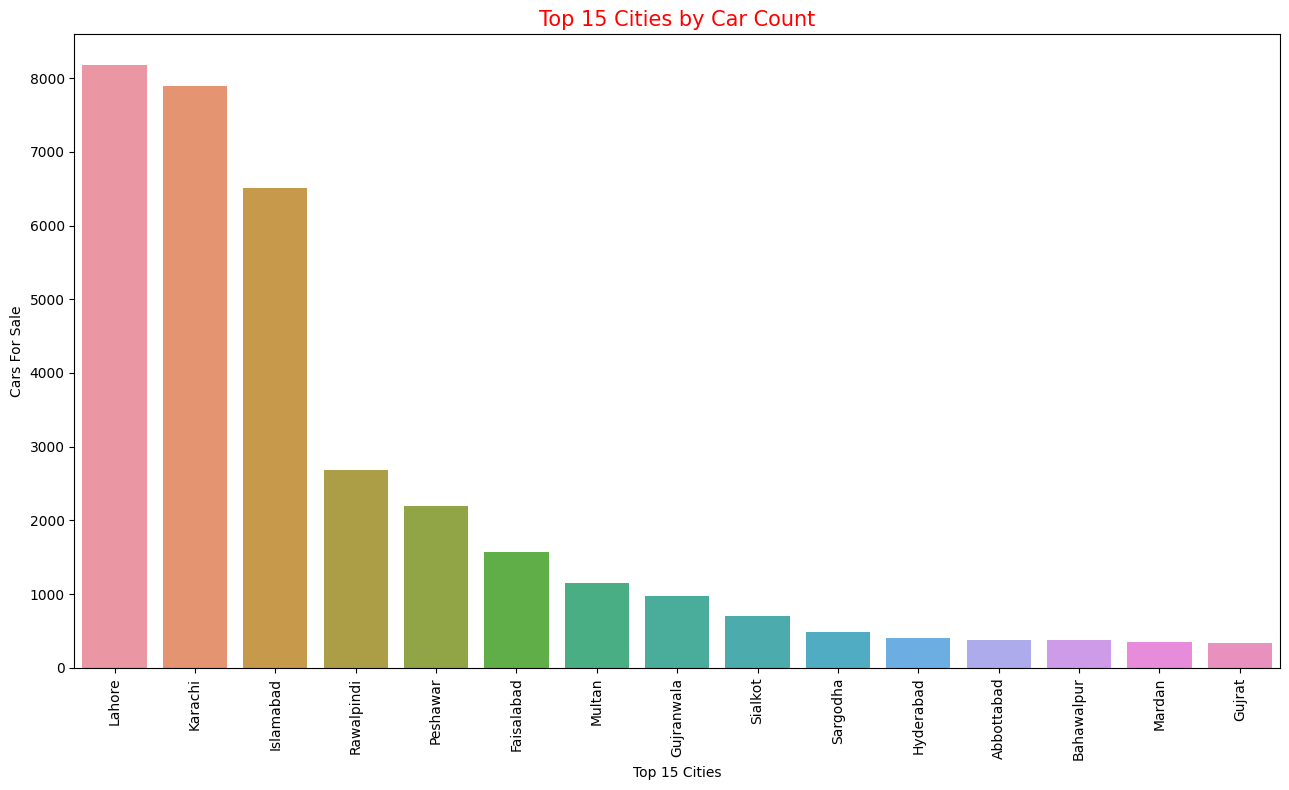

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame
#data = pd.read_csv('PakUsedCars.csv')

# Get the count of cars for each city
cities = data['City'].value_counts()

# Create a bar plot of top 10 cities by car count
plt.figure(figsize=(13, 8))
sns.barplot(x=cities[:15].index, y=cities[:15].values)
plt.ylabel('Cars For Sale')
plt.xlabel('Top 15 Cities')
plt.title('Top 15 Cities by Car Count', color='Red', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the above barplot it can easily be understood that LAHORE has the highest number of cars for sale,followed by other cities like KARACHI,
 ISLAMABAD, RAWALPINDI etc. GUJRAT has the least number of cars for sale in the above plot.

# HOW IS THE DISTRIBUTION OF CARS ACROSS DIFFERENT PRICE RANGES?
# ARE THERE ANY SPECIFIC PRICE RANGES THAT DOMINATE THE DATASET?

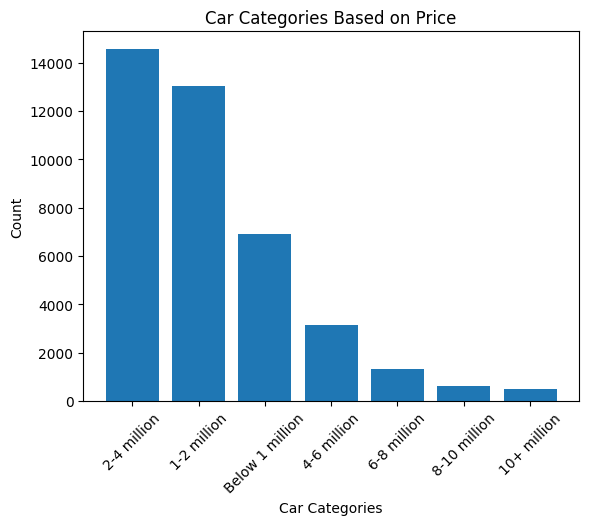

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# data = pd.read_csv('PakUsedCars.csv')  # Replace with your actual dataset filename

# Define the price range bins and labels
bins = [0, 1000001, 2000001, 4000001, 6000001, 8000001, 10000001, 100000001]
labels = ['Below 1 million', '1-2 million', '2-4 million', '4-6 million', '6-8 million', '8-10 million', '10+ million']

# Calculate the car category counts without modifying the original DataFrame
car_category_counts = pd.cut(data['Price(PKR)'], bins=bins, labels=labels).value_counts()

# Create a bar graph for car categories based on price
plt.bar(car_category_counts.index, car_category_counts.values)
plt.xlabel('Car Categories')
plt.ylabel('Count')
plt.title('Car Categories Based on Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


It can be seen that most of the used cars lie in the range of 2-4 million followed by 1-2 million. Very few car prices lie in 6 to 8 million and none from 8 million plus.

In [ ]:
print(data)

           Make                            Name Transmission Engine Type  \
0         Honda                BR-V   i-VTEC S     Automatic      Petrol   
1        Toyota  Corolla   Altis Automatic 1.6     Automatic      Petrol   
2        Toyota        Vitz   F Limited II 1.0     Automatic      Petrol   
3      Daihatsu        Move   Custom X Limited     Automatic      Petrol   
4        Toyota       Prado   TX L Package 2.7     Automatic      Petrol   
...         ...                             ...          ...         ...   
76685    Suzuki             Bolan   VX Euro II        Manual      Petrol   
76686    Toyota      Prius   G LED Edition 1.8     Automatic      Petrol   
76687       KIA                 Sportage   AWD     Automatic      Petrol   
76688    Suzuki                       Bolan           Manual      Petrol   
76689    Suzuki            Mehran   VX Euro II        Manual      Petrol   

       Engine Capacity(CC)  Mileage(kms)        City  Year  Price(PKR)  
0             

# HOW DOES PRICE DEPEND UPON THE OTHER ATTRIBUTES OF THE CAR?

In [ ]:
import pandas as pd

correlation_matrix = data.corr()

# Select correlations of 'Price' with other attributes
price_correlation = correlation_matrix['Price(PKR)']

# Create a DataFrame for the correlation values
correlation_table = pd.DataFrame({'Attribute': price_correlation.index, 'Correlation with Price': price_correlation.values})

# Sort the table by absolute correlation values
correlation_table['Abs Correlation'] = correlation_table['Correlation with Price'].abs()
correlation_table = correlation_table.sort_values(by='Abs Correlation', ascending=False)

# Display the correlation table
print(correlation_table)


             Attribute  Correlation with Price  Abs Correlation
3           Price(PKR)                1.000000         1.000000
0  Engine Capacity(CC)                0.643801         0.643801
2                 Year                0.239679         0.239679
1         Mileage(kms)               -0.188238         0.188238


<ipython-input-47-ab50f84149f8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


PRICE OF A CAR DEPENDS ON VARIOUS ATTRIBUTES SUCH AS ENGINE CAPACITY , YEAR OF MANUFACTURE , MILEAGE.

# HOW DOES THE AVERAGE PRICE OF CARS VARY ACROSS DIFFERENT MANUFACTURERS?
# ARE THERE ANY MANUFACTURERS THAT PRODUCE NOTABLY MORE EXPENSIVE OR AFFORDABLE CARS?

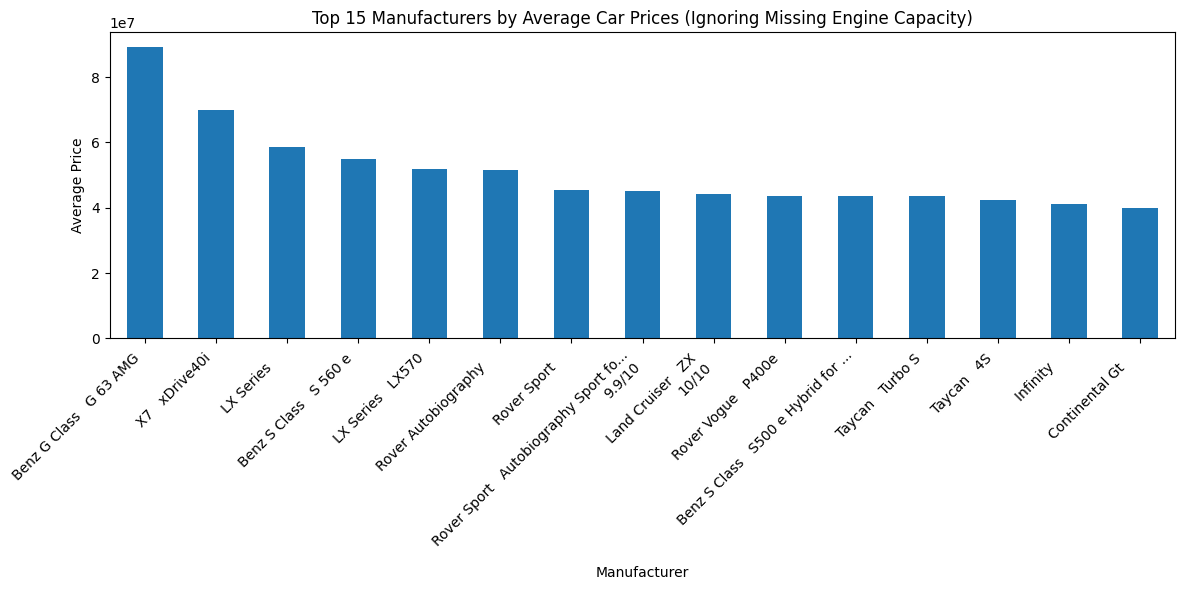

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# data = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset filename

# Check and clean the data (if needed)
# For example, you can remove rows with missing values in the 'Name' column
data = data.dropna(subset=['Name'])

# Calculate the average car prices for each manufacturer while ignoring missing values in 'Engine Capacity(CC)'
avg_prices = data.groupby('Name')['Price(PKR)'].mean()

# Sort the manufacturers by average price and select the top 15
sorted_avg_prices = avg_prices.sort_values(ascending=False)[:15]

# Create a bar plot of average car prices for the top 15 manufacturers
plt.figure(figsize=(12, 6))
sorted_avg_prices.plot(kind='bar')
plt.title('Top 15 Manufacturers by Average Car Prices (Ignoring Missing Engine Capacity)')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()







IT CAN BE SEEN THAT BENZ G IS THE MOST EXPENSIVE CAR MODEL IN THE DATASET.

# HOW DOES THE DISTRIBUTION OF CAR MILEAGE VARY ACROSS DIFFERENT CITIES?
# ARE THERE ANY CITIES WHERE CARS TEND TO HAVE HIGHER OR LOWER MILEAGE?

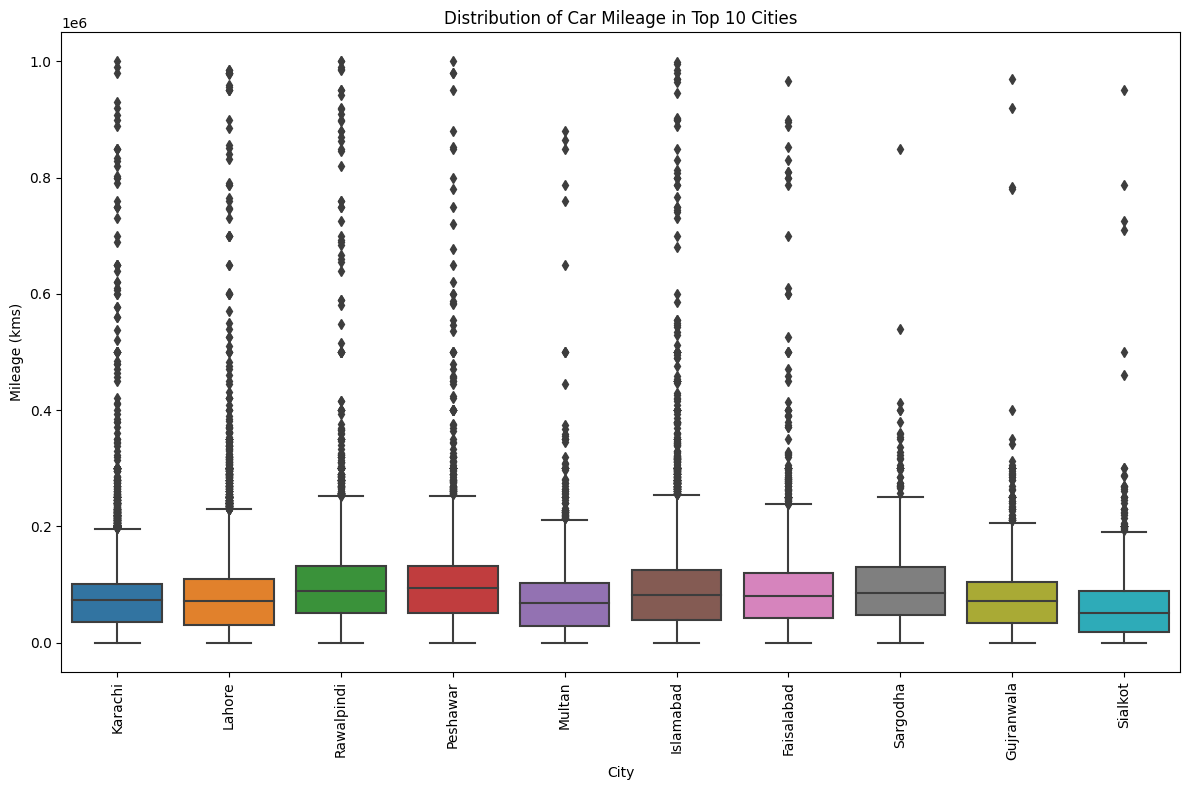

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
#data = pd.read_csv('PakUsedCars.csv')  # Replace with your actual dataset filename

# Calculate the top 10 cities by car count
top_cities = data['City'].value_counts().head(10).index

# Filter the dataset to include only data from the top 10 cities
top_city_data = data[data['City'].isin(top_cities)][['City', 'Mileage(kms)']]

# Create a box plot or violin plot to visualize mileage distribution in top 10 cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Mileage(kms)', data=top_city_data)
plt.xticks(rotation=90)
plt.ylabel('Mileage (kms)')
plt.xlabel('City')
plt.title('Distribution of Car Mileage in Top 10 Cities')
plt.tight_layout()
plt.show()

The box plot provides a visual summary of the distribution of car mileage in the top 10 cities.
 we can see middle line inside the box, box edges, and potential outliers (individual points outside the boxes) for each city.
By comparing the boxes, you can make inferences about the variability and central tendency of car mileage in different cities.


# HOW IS THE DISTRIBUTION OF ENGINE TYPES AND TRANSMISSION TYPES WITHIN THE DATASET

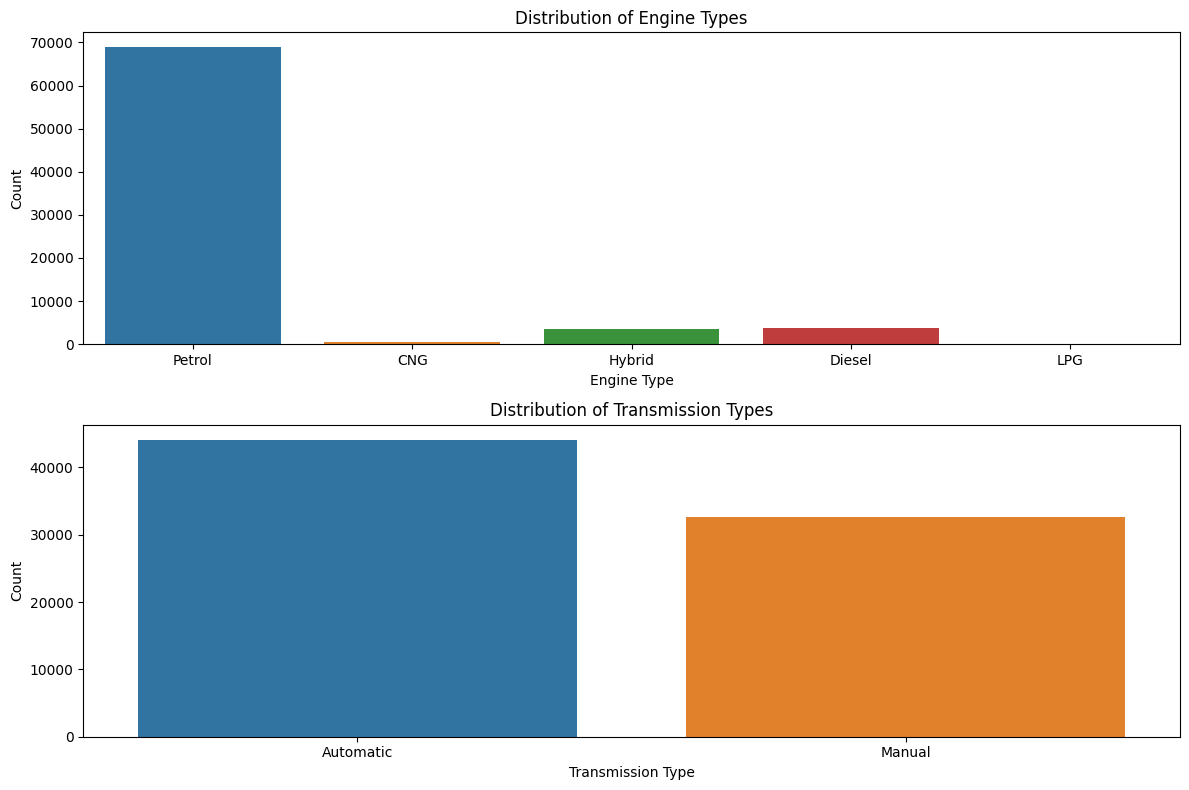

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
#data = pd.read_csv('PakUsedCars.csv')

# Create subplots for engine types and transmission types
plt.figure(figsize=(12, 8))

# Subplot for engine types distribution
plt.subplot(2, 1, 1)
sns.countplot(x='Engine Type', data=data)
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Distribution of Engine Types')

# Subplot for transmission types distribution
plt.subplot(2, 1, 2)
sns.countplot(x='Transmission', data=data)
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Distribution of Transmission Types')

plt.tight_layout()
plt.show()

FROM THE ABOVE PLOTS WE CAN INFER THAT MAXIMUM CARS IN THE DATASET HAVE PETROL AS THEIR FULE TYPE AND IN THE SECOND GRAPH CLEARLY DEPICTS THAT THE AMOUNT OF AUTOMATIC CARS ARE MORE THAN THE MANUAL IN THE DATASET.

# WHICH TRANSMISSION TYPE IS CONSIDERED TO BE MORE EXPENSIVE-MANUAL OR AUTOMATIC?

In [ ]:
import pandas as pd

# Load your dataset into a DataFrame
#data = pd.read_csv('PakUsedCars.csv')  # Replace with your actual dataset filename

# Calculate average prices for manual and automatic transmission cars
average_price_manual = data[data['Transmission'] == 'Manual']['Price(PKR)'].mean()
average_price_automatic = data[data['Transmission'] == 'Automatic']['Price(PKR)'].mean()

# Print the average prices
print(f"Average Price of Manual Transmission Cars in PKR: {average_price_manual:.2f}")
print(f"Average Price of Automatic Transmission Cars in PKR: {average_price_automatic:.2f}")

Average Price of Manual Transmission Cars in PKR: 1393260.59
Average Price of Automatic Transmission Cars in PKR: 4227086.27


HENCE AUTOMATIC CARS ARE CONSIDERED MORE EXPENSIVE THAN THE MANUAL CARS.

# REGRESSION MODEL

linear regression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
label_encoder = LabelEncoder()


In [ ]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
X = data.drop('Price(PKR)', axis=1)
y = data['Price(PKR)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_score = linear_model.score(X_train, y_train)
test_score = linear_model.score(X_test, y_test)


In [ ]:
# Get coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Display equation of the model
equation = f"y = {intercept:.2f} + "
for i, coeff in enumerate(coefficients):
    equation += f"{coeff:.2f} * {X_test.columns[i]} + "
equation = equation[:-2]  # Remove the last '+'
print("Equation:", equation)

Equation: y = -2310.73 + 0.00 * Make + 0.00 * Name + -6.52 * Transmission + -0.32 * Engine Type + 0.02 * Engine Capacity(CC) + -0.00 * Mileage(kms) + -0.00 * City + 1.15 * Year 


In [ ]:
print("Linear Regression Model")
print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")

Linear Regression Model
Train Score: 0.70
Test Score: 0.71


THE TRAIN SCORE FOR THE LINEAR REGRESSION MODEL IS - 70%
THE TEST SCORE FOR THE LINEAR REGRESSION MODEL IS - 71%

DECISION TREE


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

In [ ]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_score = decision_tree_model.score(X_train, y_train)
test_score = decision_tree_model.score(X_test, y_test)

In [ ]:
print("Decision Tree Regression Model")
print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")







Decision Tree Regression Model
Train Score: 1.00
Test Score: 0.94


THE TRAIN SCORE FOR A DECISION TREE REGRESSOR IS 100%
AND THE TEST SCORE IS 94%

RANDOM FOREST REGRESSOR


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=10 ,random_state=42, max_depth=10)
#random_forest_model = RandomForestRegressor(random_state=42)


In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [ ]:
train_score = random_forest_model.score(X_train, y_train)
test_score = random_forest_model.score(X_test, y_test)

In [ ]:
print("Random Forest Regression Model")
print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")


Random Forest Regression Model
Train Score: 0.97
Test Score: 0.95


THE TRAIN SCORE FOR RANDOM FOREST REGRESSOR IS 97%
THE TEST SCORE FOR RANDOM FOREST REGRESSOR IS 95%

KNN


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled[:10, :])

[[ 7.08393222e-01 -1.50326911e-01  1.11649574e+00  3.13002958e-01
  -7.06924412e-01  2.35071609e-01  1.28129339e+00  1.30762628e-01]
 [-2.64252485e-01  1.48590439e+00 -8.95659482e-01  3.13002958e-01
  -1.27515201e+00  1.86709678e+00  2.24111586e+00 -3.17349654e-01]
 [-1.23689819e+00 -6.63909680e-01 -8.95659482e-01  3.13002958e-01
   6.30081691e-01 -2.38215692e-01 -2.93415353e-01  2.80133389e-01]
 [ 7.08393222e-01 -1.31493009e+00  1.11649574e+00  3.13002958e-01
  -2.05547123e-01  1.05108420e+00  2.01493109e-01 -1.21357422e+00]
 [ 7.08393222e-01  6.22217311e-01  1.11649574e+00  3.13002958e-01
  -1.04117594e+00 -2.54535943e-01 -1.02827943e+00 -9.14832696e-01]
 [ 7.08393222e-01 -2.76228399e-03 -8.95659482e-01  3.13002958e-01
  -1.27515201e+00 -2.95336573e-01  1.92617411e+00  7.28245671e-01]
 [ 7.73236269e-01 -3.67333715e-01  1.11649574e+00  3.13002958e-01
  -2.05547123e-01  3.32993119e-01 -2.93415353e-01  2.80133389e-01]
 [ 7.73236269e-01 -3.93374531e-01 -8.95659482e-01  3.13002958e-01
  -

In [ ]:
knn_model = KNeighborsRegressor()


In [ ]:
knn_model.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [ ]:
train_score = knn_model.score(X_train_scaled, y_train)
test_score = knn_model.score(X_test_scaled, y_test)

In [ ]:
print("K-Nearest Neighbors Regressor Model")
print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")

K-Nearest Neighbors Regressor Model
Train Score: 0.96
Test Score: 0.94


THE TRAIN SCORE FOR KNN MODEL IS 96 %
THE TEST SCORE FOR KNN MODEL IS 94%

GRADIENT BOOSTING REGRESSOR


In [ ]:
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

In [ ]:
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
train_score = gradient_boosting_model.score(X_train, y_train)
test_score = gradient_boosting_model.score(X_test, y_test)

In [ ]:
print("Gradient Boosting Regressor Model")
print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")


Gradient Boosting Regressor Model
Train Score: 0.92
Test Score: 0.92


THE TRAIN SCORE FOR GBR MODEL IS 92%
THE TEST SCORE FOR GBR MODEL IS 92%

XGBOOST REGRESSOR

In [ ]:
!pip install xgboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# XGBoost

from xgboost import XGBRegressor, plot_importance, XGBClassifier

xgb_model = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)
# Fitting the data
xgb_model.fit(X_train, y_train)

# Checking the score
print(f"Training Score:  {xgb_model.score(X_train, y_train):.2f}")
print(f"Testing Score: {xgb_model.score(X_test, y_test):.2f}")

# Perform cross-validation
num_folds = 5  # Number of folds for cross-validation
scoring_metric = 'r2'  # Use R-squared score for evaluation, you can change to other metrics

cross_val_scores = cross_val_score(xgb_model, X, y, cv=num_folds, scoring=scoring_metric)

# Print the cross-validation scores
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: {score:.2f}")

# Print the average cross-validation score
average_score = np.mean(cross_val_scores)
print(f"Average Cross-Validation {scoring_metric.upper()} Score: {average_score:.2f}")

Training Score:  0.97
Testing Score: 0.96
Fold 1: 0.95
Fold 2: 0.96
Fold 3: 0.96
Fold 4: 0.95
Fold 5: 0.96
Average Cross-Validation R2 Score: 0.96


In [ ]:
# XGBoost --- scaled variables

from xgboost import XGBRegressor, plot_importance, XGBClassifier

xgb_model = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)
# Fitting the data
xgb_model.fit(X_train_scaled, y_train)

# Checking the score
print(f"Training Score:  {xgb_model.score(X_train_scaled, y_train):.2f}")
print(f"Testing Score: {xgb_model.score(X_test_scaled, y_test):.2f}")



Training Score:  0.97
Testing Score: 0.96


THE TRAIN SCORE FOR XGBOOST MODEL IS 97% AND TEST SCORE IS 96%.

<Figure size 1000x600 with 0 Axes>

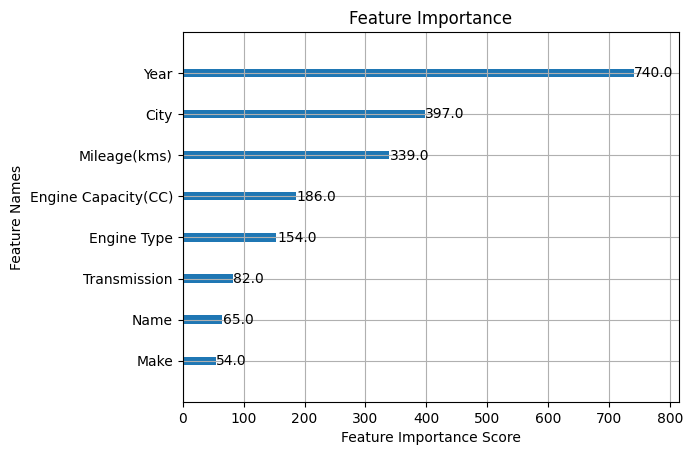

In [ ]:
# Get feature importance and feature names
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Visualizing feature importances
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')  # You can use 'weight', 'gain', or 'cover'
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Names')

# Set y-axis tick labels as the original feature names
plt.yticks(range(len(feature_names)), feature_names)

plt.show()

In [ ]:
# bias distribution

y_predict = xgb_model.predict(X_test)

no_bias_count = 0
upper_bias_count = 0
lower_bias_count = 0

for true_val, pred_val in zip(y_test, y_predict):
    if pred_val > true_val:
        upper_bias_count += 1
    elif pred_val < true_val:
        lower_bias_count += 1
    elif pred_val == true_val:
        no_bias_count += 1

total_samples = len(y_test)
upper_bias_proportion = upper_bias_count / total_samples
lower_bias_proportion = lower_bias_count / total_samples
no_bias_proportion = no_bias_count / total_samples

print("Total Predicted records: ",  total_samples)
print(f"Proportion of Upper Bias:  {upper_bias_proportion:.2f}")
print(f"Proportion of Lower Bias:  {lower_bias_proportion:.2f}")


Total Predicted records:  13440
Proportion of Upper Bias:  0.00
Proportion of Lower Bias:  1.00
